## visualization for nodules -- ALM Ortho Powders

In [71]:
## import modules and libraries for visualization 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import os

In [82]:
import os
import pandas as pd
import re

# Path to the folder containing the CSV files
folder_path = '/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/FlowCam Ti64 Powders/ImageJ Ti64 Data'
output_path = '/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/FlowCam Ti64 Powders/ImageJ Ti64 Data/ImageJoutput.csv'

# Pattern to match filenames
pattern = r"(?P<Lot>P\d+) Group (?P<Group>\d+) Rev (?P<Rev>\d+)"

dataframes = []
unmatched_files = []

# Iterate over files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        match = re.search(pattern, file_name)
        if match:
            # Extract Lot, Rev, and Group from the filename
            lot = match.group("Lot")
            group = int(match.group("Group"))
            rev = int(match.group("Rev"))
            
            # Full path to the file
            file_path = os.path.join(folder_path, file_name)
            
            try:
                # Read the CSV into a DataFrame
                df = pd.read_csv(file_path, encoding='ISO-8859-1')
                
                # Check if the DataFrame is empty
                if df.empty:
                    print(f"Warning: {file_name} is empty and will be skipped.")
                    continue
                
                # Add new columns
                df['Lot'] = lot
                df['Rev'] = rev
                df['Group'] = group
                
                # Append the DataFrame to the list
                dataframes.append(df)
                print(f"Processed file: {file_name}, shape: {df.shape}")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")
        else:
            unmatched_files.append(file_name)

# Concatenate all DataFrames
if dataframes:
    final_df = pd.concat(dataframes, ignore_index=True)
    print(f"Concatenation complete. Combined DataFrame shape: {final_df.shape}")
    
    # Save the final DataFrame to the specified file
    try:
        final_df.to_csv(output_path, index=False)
        print(f"Output saved to: {output_path}")
    except Exception as e:
        print(f"Error saving the output file: {e}")
else:
    print("No dataframes to concatenate.")

# List unmatched files
if unmatched_files:
    print("Unmatched files:")
    for file in unmatched_files:
        print(file)


Processed file: 2024-10-30 P1440 Group 1 Rev 8 R01 PP1 Results.csv, shape: (555, 25)
Processed file: 2024-10-30 P2002 Group 3 Rev 1 R01_PP2Results.csv, shape: (483, 25)
Processed file: 2024-10-30 P2002 Group 7 Rev 1 R01 PP1Results.csv, shape: (251, 25)
Processed file: 2024-10-30 P2328 Group 1 Rev 3 R01 PP1Results.csv, shape: (110, 25)
Processed file: 2024-10-30 P2002 Group 6 Rev 1 R01 PP1Results.csv, shape: (431, 25)
Processed file: 2024-10-29 P1444 Group 1 Rev 6 R01_PP2.csv, shape: (1802, 25)
Processed file: 2024-10-30 P1444 Group 3 Rev 8 R02 PP1Results.csv, shape: (745, 25)
Processed file: 2024-10-30 P1444 Group 3 Rev 5 R02 PP1Results.csv, shape: (1622, 25)
Processed file: 2024-10-30 P2002 Group 12 Rev 1 R01 PP1Results.csv, shape: (280, 25)
Processed file: 2024-10-30 P1444 Group 4 Rev 5 R02 PP1 Results.csv, shape: (1086, 25)
Processed file: 2024-10-30 P2328 Group 2 Rev 2 R01 PP1Resultscsv.csv, shape: (136, 25)
Processed file: 2024-10-29 P1444 Group 2 Rev 6 R01_PP2 Results.csv, shape:

In [83]:
# import imagej 
imagej_nodules = pd.read_csv('/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/FlowCam Ti64 Powders/ImageJ Ti64 Data/ImageJoutput.csv')
flowcam_data = pd.read_csv('/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/FlowCam Ti64 Powders/FlowCam Ti64 Data/FlowCamoutput.csv')

/var/folders/27/_cqkc85s1rz_whsq2n2qsjjr0000gn/T/ipykernel_65445/3685061138.py:3: DtypeWarning: Columns (73) have mixed types. Specify dtype option on import or set low_memory=False.
  flowcam_data = pd.read_csv('/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/FlowCam Ti64 Powders/FlowCam Ti64 Data/FlowCamoutput.csv')


In [93]:
imagej_nodules['Rev'] = pd.to_numeric(imagej_nodules['Rev'], errors='coerce')
Imagej_particle_count = imagej_nodules.groupby('Rev')['Count'].sum()
Imagej_particle_count = Imagej_particle_count.reindex(range(1, 11), fill_value=0)
Imagej_particle_count = Imagej_particle_count.tolist()

Imagej_particle_count


[5397, 5377, 112, 0, 2748, 4098, 4650, 6151, 3993, 2260]

In [94]:
flowcam_data['Rev'] = pd.to_numeric(flowcam_data['Rev'], errors='coerce')
flowcam_particle_count = [flowcam_data[flowcam_data['Rev'] == rev].shape[0] for rev in range(1, 11)]
flowcam_particle_count

[5159, 5161, 110, 0, 2708, 3960, 4575, 6048, 3871, 2214]

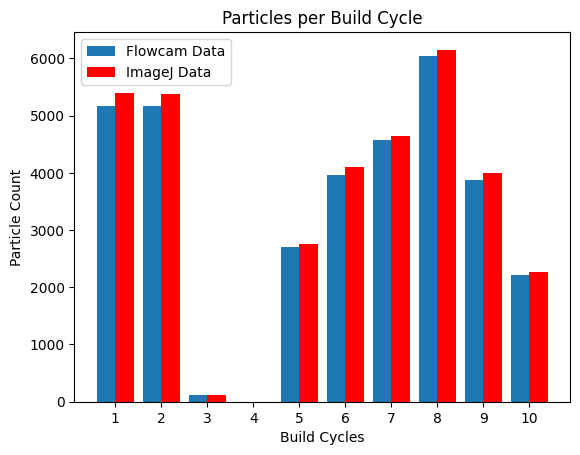

In [96]:
# plot 
X = [1,2,3,4,5,6,7,8,9,10]
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, flowcam_particle_count, 0.4, label = 'Flowcam Data')
plt.bar(X_axis + 0.2, Imagej_particle_count, 0.4, label = 'ImageJ Data', color='red')

plt.xticks(X_axis, X)
plt.xlabel('Build Cycles')
plt.ylabel('Particle Count')
plt.title('Particles per Build Cycle')
plt.legend()
plt.show()